In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
from typing import List, Tuple
import matplotlib.pyplot as plt
import numpy as np
import fdb
import loompy
import shoji
from tqdm import trange
import logging
import sys
import cytograph as cg
#from rich.progress import track
%load_ext line_profiler
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=20)


In [2]:
db = shoji.connect()
ws = db.refdb.samples.S10X241_1

2020-10-04 23:11:35,273 - INFO - GeneSummaryStatistics: Computing summary statistics for genes
2020-10-04 23:11:40,361 - INFO - GeneSummaryStatistics: Done.
2020-10-04 23:11:40,368 - INFO - SummaryStatistics: Saving mean expression per gene as float32 tensor 'MeanExpression'
2020-10-04 23:11:40,369 - INFO - SummaryStatistics: Saving standard deviation per gene as float32 tensor 'StdevExpression'
2020-10-04 23:11:41,920 - INFO - DoubletFinder: Creating artificial doublets
2020-10-04 23:12:01,100 - INFO - DoubletFinder: Feature selection and dimensionality reduction
2020-10-04 23:12:01,108 - INFO - FeatureSelectionByVariance: Fitting CV vs mean
2020-10-04 23:12:12,699 - INFO - FeatureSelectionByVariance: Done.
2020-10-04 23:12:18,002 - INFO - DoubletFinder: Initializing NN structure with k = 60
2020-10-04 23:12:19,236 - INFO - DoubletFinder: Finding the doublet score threshold
2020-10-04 23:12:21,794 - INFO - DoubletFinder: Finding doublet neighbors
2020-10-04 23:12:21,820 - INFO - Doubl

(-88.63347816467285, 100.74948310852051, -92.30757637023926, 92.74987525939942)

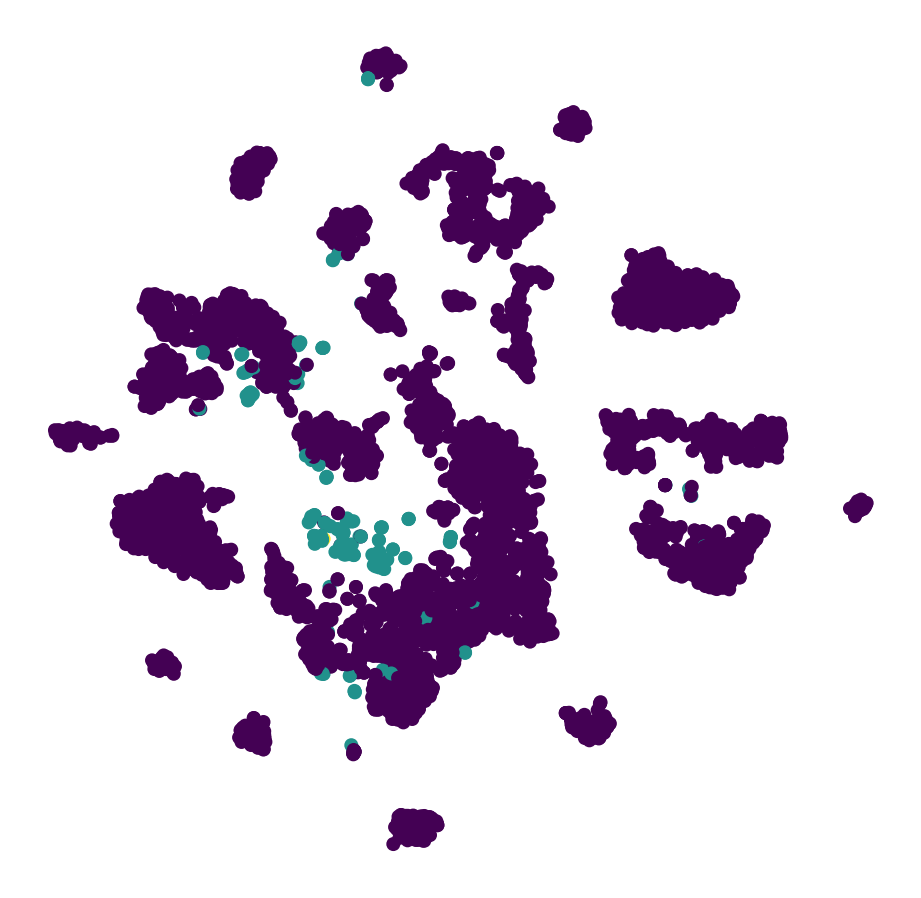

In [4]:
mu, sd = cg.GeneSummaryStatistics().fit_save(ws)
score, flag = cg.DoubletFinder().fit_save(ws)
plt.figure(figsize=(8,8))
plt.scatter(ws.TSNE[:][:, 0], ws.TSNE[:][:,1], c=flag)
plt.axis("off")

In [5]:
cg.CellSummaryStatistics(cg.human).fit_save(ws)

2020-10-04 23:13:15,562 - INFO - SummaryStatistics: Loading 'Expression' and 'Unspliced' tensors
2020-10-04 23:13:24,883 - INFO - SummaryStatistics: Computing summary statistics for cells
2020-10-04 23:13:25,398 - INFO - SummaryStatistics: Average number of non-zero genes 4756
2020-10-04 23:13:25,398 - INFO - SummaryStatistics: Average total UMIs 15865
2020-10-04 23:13:25,399 - INFO - SummaryStatistics: Average mitochondrial UMI fraction 0.39%
2020-10-04 23:13:25,399 - INFO - SummaryStatistics: Average unspliced fraction 74.01%
2020-10-04 23:13:25,399 - INFO - SummaryStatistics: Average cell cycle UMI fraction 0.11%
2020-10-04 23:13:25,479 - INFO - SummaryStatistics: Saving nnz as uint32 tensor 'NGenes'
2020-10-04 23:13:25,479 - INFO - SummaryStatistics: Saving n_UMIs as uint32 tensor 'TotalUMIs'
2020-10-04 23:13:25,480 - INFO - SummaryStatistics: Saving mitochondrial UMI fraction as float32 tensor 'MitoFraction'
2020-10-04 23:13:25,480 - INFO - SummaryStatistics: Saving unspliced frac

(array([1636, 4424, 5197, ..., 5080, 4235, 1446]),
 array([ 3770., 12644., 15072., ..., 14922., 10426.,  2246.], dtype=float32),
 array([0.        , 0.00126542, 0.00019904, ..., 0.00053612, 0.01304431,
        0.00133571], dtype=float32),
 array([0.76472149, 0.76376147, 0.75218949, ..., 0.75023455, 0.68012661,
        0.71193232]),
 array([0.00185676, 0.00166087, 0.00072983, ..., 0.00067015, 0.00124688,
        0.00133571], dtype=float32))

<ipython-input-18-e53d06c082a1>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(ws[:].MeanExpression, ws[:].StdevExpression / ws[:].MeanExpression, s=5)


(0.1, 1000)

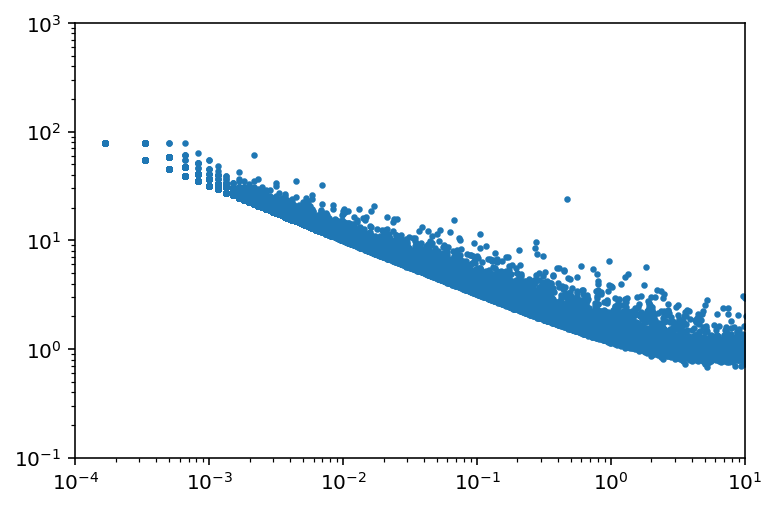

In [18]:
plt.scatter(ws[:].MeanExpression, ws[:].StdevExpression / ws[:].MeanExpression, s=5)
plt.yscale("log")
plt.xscale("log")
plt.xlim(.0001,10)
plt.ylim(0.1,1000)

In [20]:
gb = ws.cells.groupby("Clusters")

In [22]:
gb.mean("TotalUMI")

(array([ 3,  6,  0,  5,  7,  8,  4, 10, 13,  1,  2,  9, 11, 12]),
 array([16417.93045113, 16205.75110132, 15594.41492537, 16103.18358531,
        15546.26405868, 14513.13612565, 16826.64049587, 16860.21981424,
        15782.61538462, 16099.84304207, 15760.92363636, 15205.0183727 ,
        15643.89735099, 14946.6292517 ]))

In [24]:
gb = ws[ws.Clusters == 1].groupby("PassedQC_UnsplicedRatio")

In [25]:
gb.mean("TotalUMI")

(array([1, 0], dtype=uint8), array([16173.46829268,  1006.66666667]))